In [2]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [3]:
data = fetch_california_housing()

In [4]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
x_df = pd.DataFrame(data=data.data, columns=data.feature_names)
y_df = pd.DataFrame(data=data.target, columns=data.target_names)


In [7]:
x_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
y_df.shape

(20640, 1)

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_df,y_df, test_size=0.3)

# Simple Linear Regression
x_train_simple = x_train['HouseAge']
x_test_simple = x_test['HouseAge']

from sklearn.linear_model import LinearRegression
import seaborn as sns

In [23]:
x_train_simple = x_train_simple.values.reshape(x_train_simple.shape[0],1)
x_test_simple = x_test_simple.values.reshape(x_test_simple.shape[0],1)


In [24]:
model =LinearRegression()
model.fit(x_train_simple, y_train)
y_pred_simple = model.predict(x_test_simple)

In [35]:
y_pred_simple = pd.DataFrame(data=y_pred_simple, columns=['MedHouseVal'])

In [36]:
y_test

,MedHouseVal
11781,1.411
15061,1.232
6219,2.183
4368,3.068
17644,2.833
...,...
19225,2.891
11871,0.878
15442,2.157
9556,0.728


In [37]:
y_pred_simple

,MedHouseVal
0,1.886317
1,1.965151
2,2.063693
3,2.181943
4,1.975005
...,...
6187,2.004568
6188,2.152380
6189,1.817338
6190,1.935588


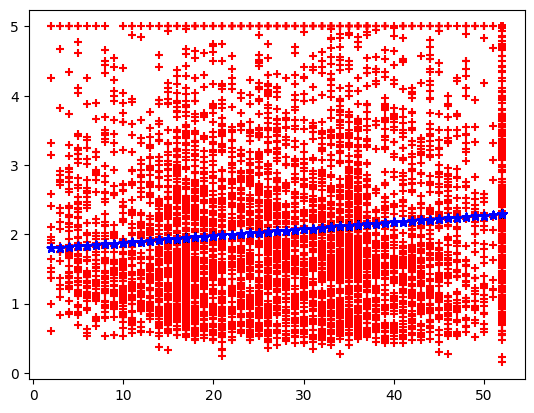

In [49]:
import matplotlib.pyplot as plt

plt.scatter(x=x_test_simple, y=y_test, marker='+', c='r')
plt.scatter(x=x_test_simple, y=y_pred_simple, marker='*', c='b')
